# Market of public catering establishments in Moscow

It is planned to open a new restaurant in Moscow, the waiters will be robots. The project has potential, but it is also expensive. For financing it is necessary to attract investors.

The purpose of the study: to analyze the situation in the public catering market in Moscow for potential project investors.

Available data: data from open sources on public catering establishments in Moscow.

Work plan:
1. Acquaintance with the available data.
2. Data preprocessing if necessary.
3. Data analysis.
4. Conclusions and recommendations on a potential restaurant, further development of the chain.
5. Preparing a presentation for investors.

<a class="anchor" id="first-bullet"></a>
## Data Acquaintance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
rest_data = pd.read_csv('/datasets/rest_data.csv')
rest_data.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


In [3]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


The available data is a table with restaurant ID, name, chain, type of establishment, address and number of seats.

## Data preprocessing

In [4]:
rest_data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [5]:
rest_data.duplicated(subset=['object_name', 'address', 'chain', 'object_type', 'number']).sum()

82

In [6]:
rest_data = rest_data.drop_duplicates(subset=['object_name', 'address', 'chain', 'object_type', 'number'])
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15284 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15284 non-null  int64 
 1   object_name  15284 non-null  object
 2   chain        15284 non-null  object
 3   object_type  15284 non-null  object
 4   address      15284 non-null  object
 5   number       15284 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 835.8+ KB


In [7]:
rest_data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [8]:
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['object_name'].unique()

array(['сметана', 'родник', 'кафе «академия»', ..., 'бар мята lounge',
       'мята lounge октябрьская', 'кальянная «мята lounge»'], dtype=object)

In [9]:
new_name = {'предприятие быстрого обслуживания':'фаст-фуд', 'магазин (отдел кулинарии)':'отдел кулинарии'}
rest_data.replace(new_name, inplace=True)
rest_data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная', 'фаст-фуд', 'ресторан',
       'кафетерий', 'буфет', 'бар', 'отдел кулинарии'], dtype=object)

Все столбцы таблицы нужного типа данных, были удалены явные дубликаты. Явные дубликаты в таблице не обнаружены, пропуски также отсутствуют. Для удобства построения графиков также была заменена чать наименований типов объектов питания. 

## Data analysis

### The ratio of types of public catering facilities by number

In [10]:
chart = rest_data.groupby('object_type').count().reset_index()
sum = chart['id'].sum()
chart['share'] = chart['id'] / sum * 100
chart[['object_type', 'id', 'share']].sort_values(by='id').sort_values(by='id', ascending=False).rename(
    columns={'id':'Количество объектов','object_type':'Тип объекта', 'share':'Доля'}) 

,Тип объекта,Количество объектов,Доля
3,кафе,6071,39.721277
7,столовая,2584,16.906569
6,ресторан,2282,14.930646
8,фаст-фуд,1898,12.418215
0,бар,855,5.594085
1,буфет,577,3.775190
4,кафетерий,395,2.584402
2,закусочная,349,2.283434
5,отдел кулинарии,273,1.786182


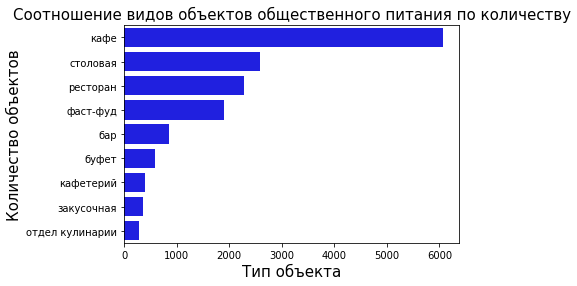

In [11]:
chart = rest_data.groupby('object_type').count().reset_index()
ax = sns.barplot(x='object_name', y='object_type', data=chart
                 .sort_values(by='number', ascending=False), color = 'blue')
plt.ylabel('Количество объектов', size=15)
plt.xlabel('Тип объекта', size=15)
plt.title('Соотношение видов объектов общественного питания по количеству', size=15)
plt.show()

Among all public catering establishments, cafes account for the largest number - 39.7% (6071 establishments). Canteens (16.9%) and restaurants (14.9%) are far behind in the 2nd and 3rd places. Another 12.4% falls on fast food (quick service establishments). The share of other types of catering establishments does not exceed 6%.

### The ratio of chain and non-chain establishments by number

In [12]:
chain_table = rest_data.groupby('chain')['id'].count()
chain_table

chain
да      2964
нет    12320
Name: id, dtype: int64

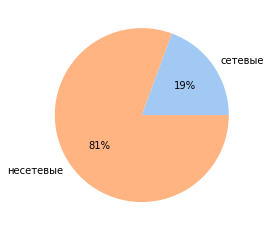

In [13]:
labels = ['сетевые', 'несетевые']
colors = sns.color_palette('pastel')[0:5]
plt.pie(chain_table, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

The share of non-chain establishments accounts for more than 81%, the share of network establishments is only 19%.

### What type of public catering facility is characterized by network distribution?

In [14]:
chain_type = (rest_data.query('chain == "да"')
      .groupby('object_type').agg({'id':'count'})
      .reset_index()
      .sort_values(by='id', ascending=False)  
      .rename(
    columns={'id':'Количество','object_type':'Тип объекта'})
     )
sum = chain_type['Количество'].sum()
chain_type['Доля'] = chain_type['Количество'] / sum * 100
chain_type

,Тип объекта,Количество,Доля
3,кафе,1396,47.098516
8,фаст-фуд,788,26.585695
6,ресторан,543,18.319838
5,отдел кулинарии,78,2.631579
2,закусочная,56,1.889339
4,кафетерий,52,1.754386
0,бар,37,1.248313
1,буфет,11,0.371120
7,столовая,3,0.101215


<AxesSubplot:xlabel='Доля', ylabel='Тип объекта'>

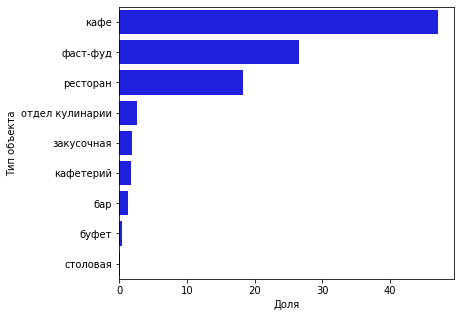

In [15]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(x = chain_type['Доля'], y = chain_type['Тип объекта'], ax=ax, color = 'blue')


Among chain catering establishments, the main share is also accounted for by cafes (47%), as well as 26.6% for fast food and 18.3% for restaurants. The share of other types of catering in chains is less than 3%.

### What is typical for network establishments

In [16]:
chain = rest_data.query('chain == "да"')
chain

,id,object_name,chain,object_type,address,number
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,алло пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,суши wok,да,фаст-фуд,"город Москва, Азовская улица, дом 3",7
18,58565,тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


<AxesSubplot:xlabel='number', ylabel='object_type'>

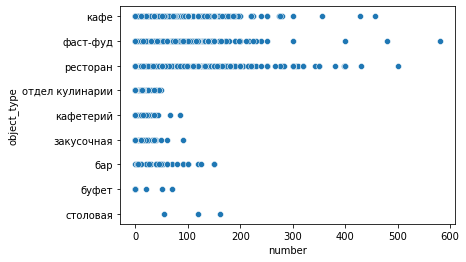

In [17]:
sns.scatterplot(data=chain, x="number", y="object_type")

In [33]:
chain_2 = (chain.groupby('object_type')
               .agg({'id':'count', 'number':'mean'})
               .reset_index()
               .rename(columns={'object_type':'Тип заведения','id':'Число заведений', 'number':'Среднее число мест'})
               .sort_values(by='Число заведений', ascending=False)   
               )
              
chain_2

,Тип заведения,Число заведений,Среднее число мест
3,кафе,1396,47.426934
8,фаст-фуд,788,40.319797
6,ресторан,543,100.362799
5,отдел кулинарии,78,8.679487
2,закусочная,56,14.375000
4,кафетерий,52,12.269231
0,бар,37,53.027027
1,буфет,11,12.727273
7,столовая,3,112.333333


<AxesSubplot:xlabel='Число заведений', ylabel='Среднее число мест'>

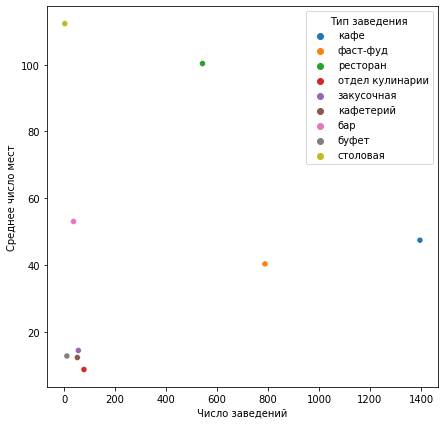

In [44]:
fig = plt.gcf()
fig.set_size_inches(7, 7)
sns.scatterplot(data=chain_2, x="Число заведений", y="Среднее число мест", hue = "Тип заведения")

In [18]:
number_max = chain['number'].max()
number_min = chain['number'].min()
number_median = chain['number'].median()
number_avg = chain['number'].mean()
print('Максиальное число посадочных мест', number_max,
     '\nМинимальное число посадочных мест', number_min,
     '\nМедианное число посадочных мест', number_median,
     '\nСреднее число посадочных мест', number_avg.round(1))

Максиальное число посадочных мест 580 
Минимальное число посадочных мест 0 
Медианное число посадочных мест 40.0 
Среднее число посадочных мест 53.0


In [19]:
chain_number = (chain.groupby('object_type')
               .agg({'id':'count', 'number':'mean'})
               .reset_index()
               .rename(columns={'object_type':'Тип заведения','id':'Число заведений', 'number':'Среднее число мест'})
               .sort_values(by='Число заведений', ascending=False)   
               )
              
chain_number

,Тип заведения,Число заведений,Среднее число мест
3,кафе,1396,47.426934
8,фаст-фуд,788,40.319797
6,ресторан,543,100.362799
5,отдел кулинарии,78,8.679487
2,закусочная,56,14.375000
4,кафетерий,52,12.269231
0,бар,37,53.027027
1,буфет,11,12.727273
7,столовая,3,112.333333


In [20]:
np.percentile(chain_number['Среднее число мест'], [75])

array([53.02702703])

In [21]:
number_type = (rest_data
               .groupby('object_type').agg({'number':['mean','median']})
               .reset_index()
              )
number_type.columns = ['Тип заведения','Среднее число мест','Медианное число мест']
number_type.sort_values(by='Среднее число мест', ascending=False)

,Тип заведения,Среднее число мест,Медианное число мест
7,столовая,130.337848,103
6,ресторан,96.884750,80
1,буфет,51.509532,32
0,бар,43.533333,35
3,кафе,39.785703,30
8,фаст-фуд,20.808219,6
4,кафетерий,9.184810,6
2,закусочная,7.825215,0
5,отдел кулинарии,5.589744,0


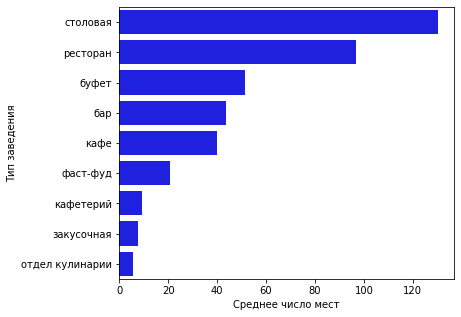

In [22]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.barplot(x="Среднее число мест", y="Тип заведения", data = number_type.sort_values(by = 'Среднее число мест', ascending = False), ax=ax, color = 'blue')

<AxesSubplot:xlabel='Медианное число мест', ylabel='Тип заведения'>

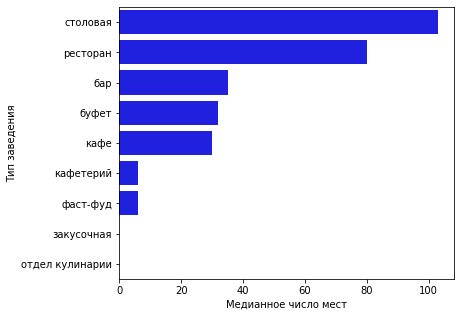

In [23]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(x="Медианное число мест", y="Тип заведения", data=number_type.sort_values(by = 'Медианное число мест', ascending = False), ax=ax, color = 'blue')

The analysis of the number of seats by network establishments allowed us to draw the following conclusions:

1. The maximum number of seats is 580. But the median value is 40, and 75% of chain catering establishments have less than 53 seats. So we will assume that less than 53 - few seats, more than 53 - a lot of seats.
2. The largest number of seats is at canteens, on average 130, while the spread, judging by the schedule, is significant. Restaurants also have a lot of seats - an average of 93.
3. Thus, chain catering establishments usually have a small number of seats.

### Selecting streets in a separate column

In [24]:
address = rest_data['address']

listing = []
for adress in rest_data['address']:  
    city = adress.find('город москва')
    house = adress.find('дом')
    listing.append(adress[city+15:house-2])

In [25]:
rest_data['street'] = listing
rest_data

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,"поселение Московский, Киевское шоссе, 22-й кил..."


### Top 10 streets by the number of catering facilities

In [26]:
street_top = (rest_data.groupby(['street'])
                    .agg({'object_name':'count'})
                    .sort_values(by='object_name', ascending=False)
                    .reset_index()
                   )
street_top

,street,object_name
0,проспект Мира,204
1,Профсоюзная улица,181
2,Ленинградский проспект,169
3,Пресненская набережная,167
4,Варшавское шоссе,155
...,...,...
2235,6-я улица Лазенки,1
2236,6-я Кожуховская улица,1
2237,Челюскинская улица,1
2238,6-й Лучевой просек,1


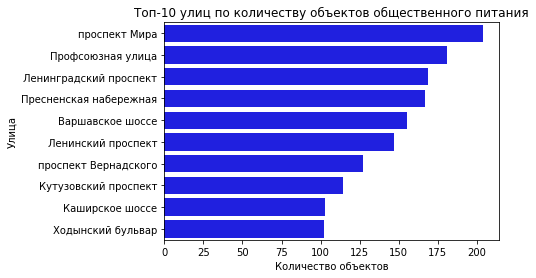

In [27]:
ax = sns.barplot(y = 'street', x='object_name', data=street_top.head(10), color = 'blue')
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Улица')
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
plt.show()

The leaders in the number of catering establishments in Moscow are Prospekt Mira (204 establishments), st. Profsoyuznaya (181 establishments), Leningradsky Prospekt (169 establishments).

These streets are located in the following areas - Prospect Mira: Meshchansky, Maryina Roshcha, Alekseevsky, Ostankinsky, Sviblovo, Rostokino

Profsoyuznaya street: Akademichesky, Konkovo, Obruchevsky, Tyoply Stan, Cheryomushki, Yasenevo

Leningradsky Prospekt: ​​Begovoy, Airport, Sokol, Khoroshevsky

Presnenskaya embankment: Presnensky

Warsaw highway: Donskoy, Nagatino-Sadovniki, Nagorny

Leninsky Prospekt: ​​Gagarinsky and Donskoy

Prospect Vernadsky: Prospect Vernadsky

Kutuzovsky prospect: Dorogomilovo, Fili-Davydkovo

Kashirskoye Highway: Nagatino-Sadovniki and Nagorny

Khodynsky Boulevard: Khoroshevsky

### Streets with one catering facility

In [28]:
street_top[street_top['object_name'] == 1]['street'].nunique()

796

In [29]:
from io import BytesIO
import requests
link = '1jB0T2q4XbQMUOSVmjCMS8cJDhBjdmhJcWcwsV_WcsQM'
data = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(link)
get = requests.get(data)
moscow_street = pd.read_csv(BytesIO(get.content))
moscow_street.rename(columns={'streetname' : 'street'}, inplace = True)
moscow_street.head()

,street,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [30]:
one_street = street_top.merge(moscow_street, on='street', how='left')
one_street

,street,object_name,areaid,okrug,area
0,проспект Мира,204,70.0,СВАО,Алексеевский район
1,проспект Мира,204,86.0,СВАО,Ярославский Район
2,проспект Мира,204,78.0,СВАО,Район Марьина роща
3,проспект Мира,204,79.0,СВАО,Останкинский район
4,проспект Мира,204,81.0,СВАО,Район Ростокино
...,...,...,...,...,...
2738,6-я улица Лазенки,1,42.0,ЗАО,Район Ново-Переделкино
2739,6-я Кожуховская улица,1,122.0,ЮВАО,Южнопортовый Район
2740,Челюскинская улица,1,76.0,СВАО,Лосиноостровский район
2741,6-й Лучевой просек,1,26.0,ВАО,Район Сокольники


In [31]:
one_street['area'].value_counts().to_frame()

,area
Тверской район,106
Пресненский район,87
Таганский район,81
Басманный район,80
Район Хамовники,74
...,...
Район Матушкино-Савелки,4
Район Восточный,3
Район Капотня,3
Панфиловский район,3


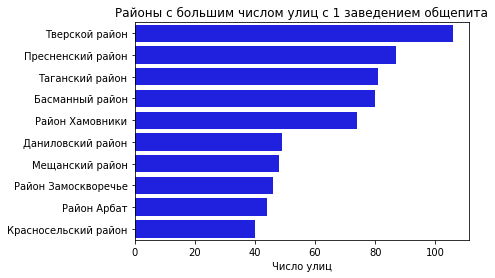

In [32]:
ax = sns.barplot(y = 'index', x='area', data=one_street['area'].value_counts().reset_index().head(10), color = 'blue')
ax.set_xlabel('Число улиц')
ax.set_ylabel('')
ax.set_title('Районы с большим числом улиц с 1 заведением общепита')
plt.show()

In total, there are 796 streets with 1 catering establishment in Moscow. Most of these streets are in Tverskoy, Presnensky and Tagansky districts. Which raises questions, since these areas are located within the Garden Ring and around, i.e. quite popular. Perhaps the fact is that the streets there are of short length, and therefore only 1 institution gets on the street. 

# Conclusions

The purpose of the study was to analyze the situation in the public catering market in Moscow for the future investment project of a cafe with robots. The following results were obtained during the analysis:

1. Most of all public catering establishments by type of cafe - there are about 6,000 of them (40%). Next in popularity are canteens (16.9%), restaurants (14.9%) and fast food (12.4%). Least of all catering points in stores (culinary department).
2. The vast majority of non-chain catering establishments (81%).
3. Chain establishments are most often cafes (47.0%), fast food (26.5%) and restaurants (18.3%).
4. Network establishments also usually have a small number of seats.
5. The largest number of seats is at canteens, on average 130, while the spread is significant. Restaurants also have a lot of seats - an average of 93.
6. The largest number of catering establishments on the streets are Mira Avenue, Profsoyuznaya Street, Leningradsky Avenue, Presnenskaya Embankment, Varshavskoye Highway, Leninsky Avenue, Vernadsky Avenue, Kutuzovsky Avenue, Kashirskoye Highway and Kirovogradskaya Street.
7. There are 796 streets in Moscow with one catering establishment. Most of these streets are in the Tver, Presnensky, Tagansky districts.

# Recommendations for an investment project

1. As a type of establishment, you should choose a cafe, as this is the most popular and common type of catering.
2. The location of the institution should be in the center (CAO) and in places with high traffic.
3. The number of seats is better to choose from 43 to 50 seats, as the most popular and convenient medium format.